In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime, timedelta
from utide import solve
from statsmodels.tsa.stattools import acf, adfuller, ccf, ccovf

In [10]:
from analysis_routines import *
from plotting_routines_xr import *
from harmonic_analysis import *
from wavelet_analysis import *
from processing_routines import datenum_to_epoch
plt.style.use('/home/manu/TFG_repo/notebooks/mplstyles/notebook.mplstyle')
from statsmodels.tsa.stattools import acf, adfuller, ccf, ccovf

In [11]:
df_ci = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
data = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')
G05 = pd.read_csv(data_dir / 'SHDR_fit/aux/G05.csv', index_col='date', parse_dates=True)
delta05_ci = pd.read_csv(data_dir / 'SHDR_fit/aux/delta05_ci.csv', index_col='date', parse_dates=True)

In [12]:
D1_filtered = lowpass_filter(df_ci.D1, data.date, 1/5, 1/1800)
G005_filtered = lowpass_filter(G05.x, data.date, 1/5, 1/1800)

hi = period_to_freq(6, 'h')
G005_strong_highcut = lowpass_filter(G05.x, data.date, 1/5, hi)
D1_strong_highcut = lowpass_filter(df_ci.D1, data.date, 1/5, hi)

# Harmoic analysis & Utide
Nota 1: Filtrar M2 en las series de los termistores o de D1 no tiene efectos significativos sobre los demas constituyentes

Nota 2: Filtro lowpass para quitar ruido de altas frecuencias tmapoco tiene efectos significativos en en análisis con UTide 

## Completo

In [6]:
complete_ci = TidalComponentsFit.compute(df_ci, period=[None, None, 6])

In [7]:
complete_ci.clean()

In [11]:
complete_ci.D1

,period,PE,SNR,A,A_ci,g,g_ci
name,,,,,,,
M2,12.420601,5.618951,39.174451,2.928870,0.917180,47.610279,17.941438
K1,23.934470,3.675320,18.264360,2.368754,1.086360,146.534635,26.281745
2Q1,28.006223,2.024010,10.056212,1.757837,1.086470,245.726421,35.412104
L2,12.191620,1.483654,10.344140,1.505008,0.917165,16.728448,34.916092
O1,25.819342,1.074583,5.341629,1.280832,1.086204,266.146244,48.612076


# ESPECTROS GLOBALES CON FFT

In [32]:
coriolis_frequency = 2*7.2921e-5*np.sin(np.deg2rad(data.lat.data)[0])
coriolis_freq_cps = coriolis_frequency/2/np.pi
coriolis_freq_cpd = coriolis_freq_cps*60*60*24
M2_cpd = 1/12.42061*24
M6_cpd = 1/4.14020*24
M4_cpd = 1/6.210301*24
K1_cpd = 1/23.934470*24
Q1_cpd = 1/28.006223*24
M3_cpd = 1/8.280401*24
M8_cpd = 1/3.105150*24
O1_cpd = 1/1/25.819351*24 # not present in temperature record
Q1_2_cpd = 1/28.006223*24

In [8]:
D1_ = df_ci['D1']
freqs_D1, psd_D1, dof_D1 = windowed_spectrum(D1_, 5/60/60/24, 28, 3) #window 42.67

In [9]:
a2_ = df_ci['a2']
freqs_a2, psd_a2, dof_a2 = windowed_spectrum(a2_, 5/60/60/24, 28, 3) #window 42.67

In [10]:
a1_ = df_ci['a1']
freqs_a1, psd_a1, dof_a1 = windowed_spectrum(a1_, 5/60/60/24, 28, 3) #window 42.67

In [11]:
freqs_G05, psd_G05, dof_G05 = windowed_spectrum(G05.x, 5/60/60/24, 28, 3) #window 42.67

In [12]:
temp_8 = data.temp[:, 8].data
freqs_temp_8, psd_temp_8, dof_temp_8 = windowed_spectrum(temp_8, 5/60/60/24, 28, 3) #window 42.673
temp_7 = data.temp[:, 7].data
freqs_temp_7, psd_temp_7, dof_temp_7 = windowed_spectrum(temp_7, 5/60/60/24, 28, 3) #window 42.67

temp_10 = data.temp[:, 10].data
freqs_temp_10, psd_temp_10, dof_temp_10 = windowed_spectrum(temp_10, 5/60/60/24, 28, 3) #window 42.67

temp_14 = data.temp[:, 14].data
freqs_temp_14, psd_temp_14, dof_temp_14 = windowed_spectrum(temp_14, 5/60/60/24, 28, 3) #window 42.67

temp_4 = data.temp[:, 4].data
freqs_temp_4, psd_temp_4, dof_temp_4 = windowed_spectrum(temp_4, 5/60/60/24, 28, 3) #window 42.67

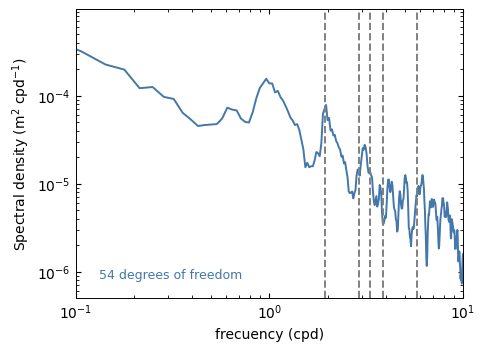

In [18]:
plot_spectrum(freqs_G05, psd_G05, dof_G05, 'cpd', 'm', vlines=[coriolis_freq_cpd + M2_cpd,
                                                               M2_cpd, M4_cpd, M3_cpd, M6_cpd], 
              xlim=(10**-1, 10**1), ylim=(5*10**-7, None))

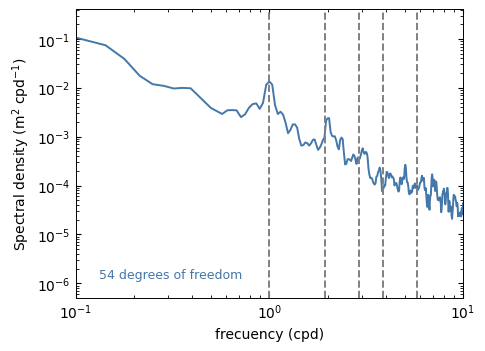

In [15]:
plot_spectrum(freqs_a1, psd_a1, dof_a1, 'cpd', 'm', vlines=[1, M2_cpd, M4_cpd, M6_cpd, M3_cpd], 
              xlim=(10**-1, 10**1), ylim=(5*10**-7, None))

In [27]:
M2_cpd - coriolis_freq_cpd 

0.5444767310966911

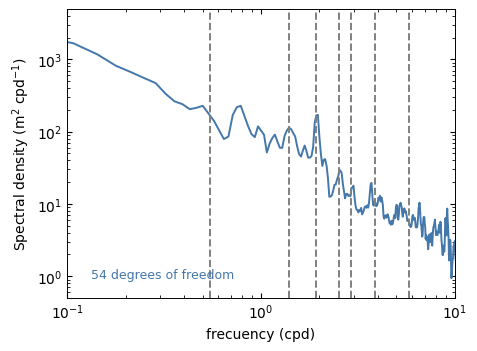

In [29]:
plot_spectrum(freqs_D1, psd_D1, dof_D1, 'cpd', 'm', vlines=[1*coriolis_freq_cpd, M2_cpd, M2_cpd - coriolis_freq_cpd,
                                                            M3_cpd, 1/9.5*24, M6_cpd, M4_cpd], 
              xlim=(10**-1, 10**1), ylim=(5*10**-1,None))

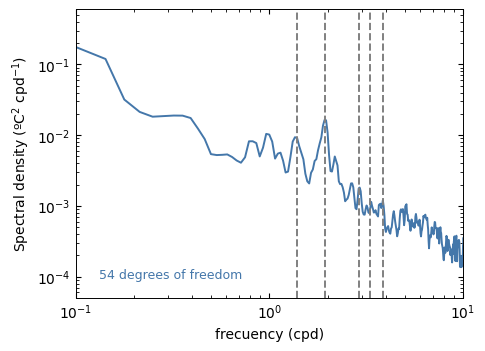

In [19]:
plot_spectrum(freqs_a2, psd_a2, dof_a2, 'cpd', 'ºC', vlines=[1*coriolis_freq_cpd, M2_cpd, M3_cpd, 
                                                             coriolis_freq_cpd + M2_cpd, M4_cpd], 
              xlim=(10**-1, 10**1), ylim=(5*10**-5, None))

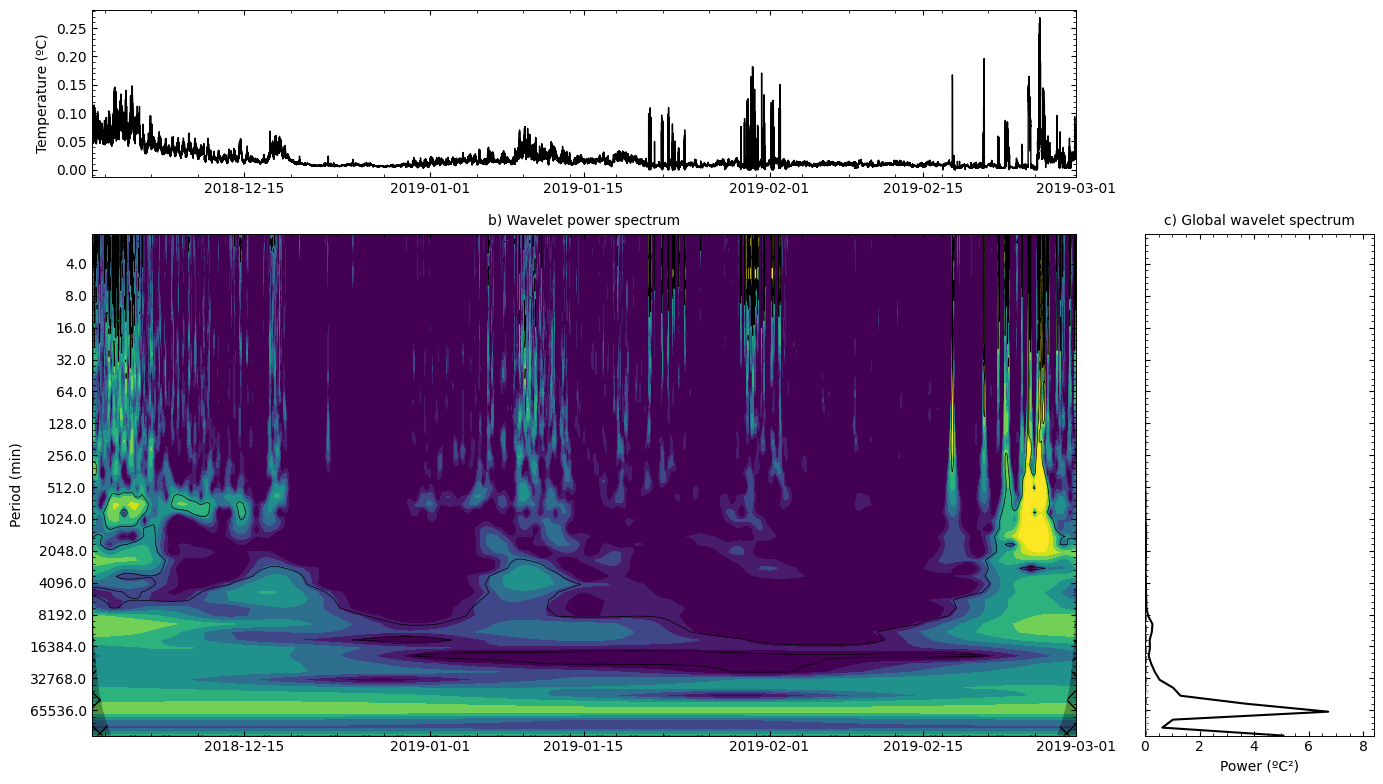

In [29]:
wavelet_power_spectrum(G05.x, data.date, period=[datetime(2018, 12, 1), datetime(2019, 3, 1), 12], norm_levels=2**9)

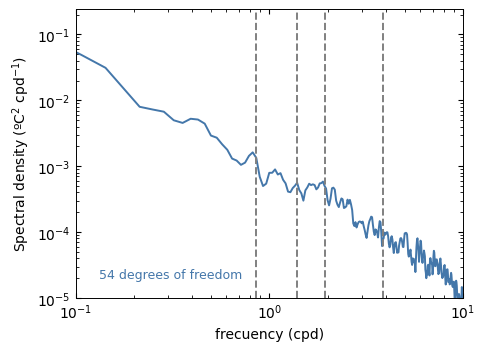

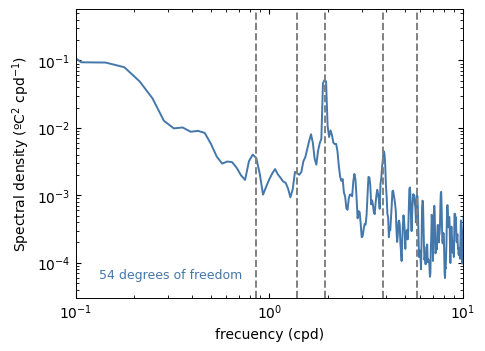

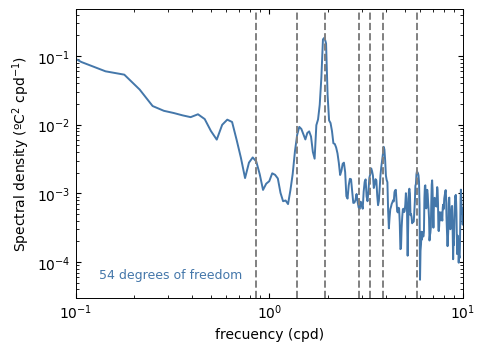

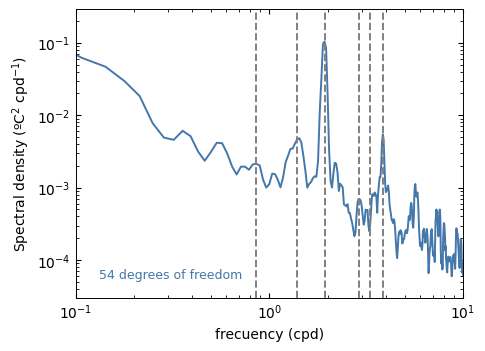

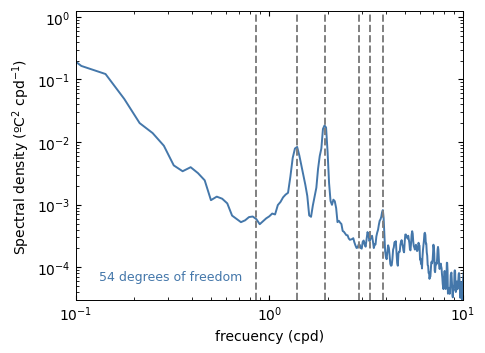

In [20]:
plot_spectrum(freqs_temp_4, psd_temp_4, dof_temp_4, 'cpd', 'ºC', 
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd], 
              xlim=(10**-1, 10**1), ylim=(1*10**-5, None))

plot_spectrum(freqs_temp_7, psd_temp_7, dof_temp_7, 'cpd', 'ºC', 
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd, M6_cpd], 
              xlim=(10**-1, 10**1), ylim=(3*10**-5, None))

plot_spectrum(freqs_temp_8, psd_temp_8, dof_temp_8, 'cpd', 'ºC', 
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd, M6_cpd, M3_cpd, coriolis_freq_cpd + M2_cpd], 
              xlim=(10**-1, 10**1), ylim=(3*10**-5, None))

plot_spectrum(freqs_temp_10, psd_temp_10, dof_temp_10, 'cpd', 'ºC', 
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd, M3_cpd, coriolis_freq_cpd + M2_cpd], 
              xlim=(10**-1, 10**1), ylim=(3*10**-5, None))

plot_spectrum(freqs_temp_14, psd_temp_14, dof_temp_14, 'cpd', 'ºC', 
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd, M3_cpd, coriolis_freq_cpd + M2_cpd], 
              xlim=(10**-1, 10**1), ylim=(3*10**-5, None))

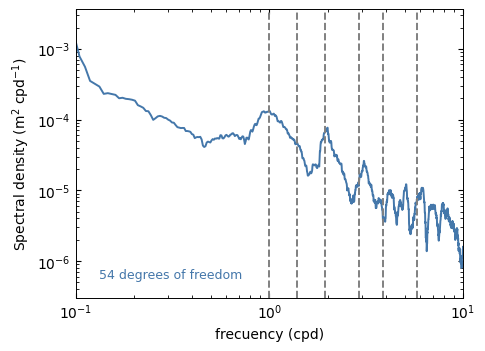

In [289]:
freqs, amplitude, power, psd, dof = spectrum(G05.x.to_numpy(), 5/60/60/24, 27)
plot_spectrum(freqs, psd, dof, 'cpd', 'm', vlines=[1, M2_cpd, M4_cpd, M3_cpd, M6_cpd, coriolis_freq_cpd], 
              xlim=(10**-1, 10**1), ylim=(3*10**-7, None))

In [21]:
coriolis_freq_cpd + M2_cpd

3.3200677638999316

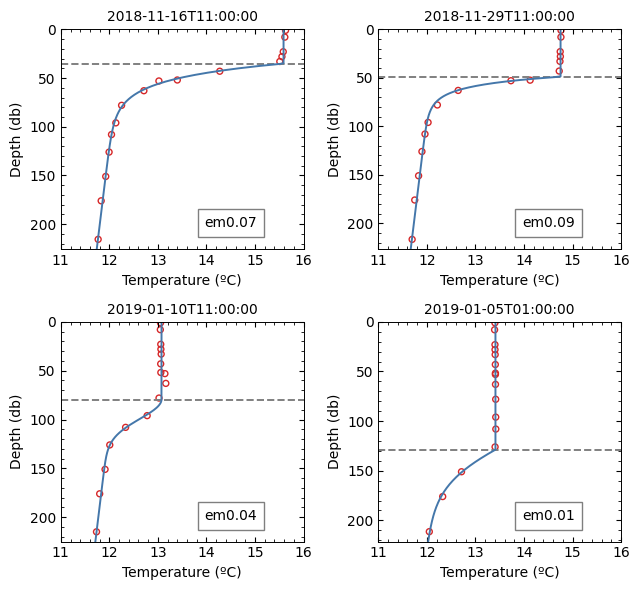

In [254]:
# perfiles de los tres periodos
dates_ = [datetime(2018, 11, 16, 11), datetime(2018, 11, 29, 11), 
          datetime(2019, 1, 10, 11), datetime(2019, 1, 5, 1)]
plot_multiple_profiles(df_ci, data, dates_)

In [46]:
def cross_shit(var1, var2, date, n_smooth, period=[None, None]):
    slice_ = slice(*period)
    
from multitaper import MTCross

In [191]:
a = MTCross(x=df_ci.D1[None:date_1].to_numpy(), y=G05[None:date_1].to_numpy(), dt=5/60/60/24, kspec=4, iadapt=0, nfft=len(G05[None:date_1]))
#b = MTCross(df_ci.D1.to_numpy(), G05.to_numpy(), dt=5/60/60/24, kspec=8)

DPSS using interpolation 130321 100000


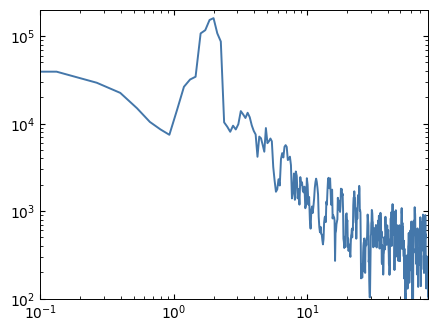

In [192]:
plt.plot(a.freq, a.Sxx)
plt.xlim(10**-1, 8*10**1)
plt.xscale('log')
plt.ylim(10**2, 2*10**5)
plt.yscale('log')

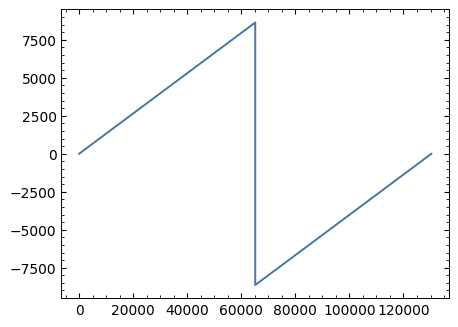

In [167]:
plt.plot(a.freq)

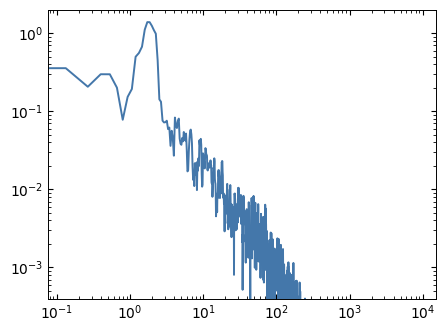

In [193]:
plt.plot(a.freq, a.Syy)
#plt.xlim(-8*10**1, -10**-1)
plt.xscale('log')
plt.ylim(4*10**-4, 2*10**0)
plt.yscale('log')

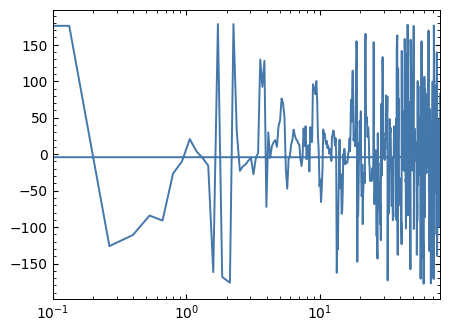

In [194]:
plt.plot(a.freq, a.phase)
plt.xlim(10**-1, 8*10**1)
plt.xscale('log')
#plt.ylim(4*10**-4, 2*10**0)
#plt.yscale('log')

In [176]:
b, c, d = a.mt_corr()

In [150]:
help(a.mt_corr)

Help on method mt_corr in module multitaper.mtcross:

mt_corr() method of multitaper.mtcross.MTCross instance
    Compute time-domain via iFFT of cross-spectrum, 
    coherency, and transfer function
    
    Cross spectrum, coherency and transfer function 
    already pre-computed in MTCross.
    
    **Returns**
    
    xcorr : ndarray [nfft]
        time domain of the transfer function. 
    dcohy : ndarray [nfft]
        time domain of the transfer function. 
    dfun : ndarray [nfft]
        time domain of the transfer function. 
        
    Delay time t=0 in centered in the middle.
    
    **Notes**
    
    The three correlation-based estimates in the time domain
        - correlation (cross-spectrum)
        - deconvolution (transfer function)
        - norm correlation (coherency)
    Correlation:
        - Sxy = Sx*conj(Sy)
    Deconvolution:
        - Sxy/Sy = Sx*conj(Sy)/Sy^2
    Coherency
        - Sxy/sqrt(Sx*Sy)
    
    |



In [146]:
help(b)

Help on tuple object:

class tuple(object)
 |  tuple(iterable=(), /)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Built-in subclasses:
 |      asyncgen_hooks
 |      UnraisableHookArgs
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |

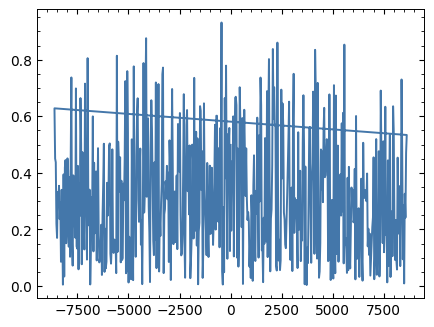

In [185]:
plt.plot(a.freq[::240], a.cohe[::240])

In [180]:
help(a)

Help on MTCross in module multitaper.mtcross object:

class MTCross(builtins.object)
 |  MTCross(x, y, nw=4, kspec=0, dt=1.0, nfft=0, iadapt=0, wl=0.0)
 |  
 |  A class for bi-variate Thomson multitaper estimates. 
 |  It performs main steps in bi-variate multitaper estimation, 
 |  including cross-spectrum, coherency and transfer function.
 |  
 |  **Attributes**
 |  
 |  *Parameters*
 |  
 |  npts   : int
 |      number of points of time series
 |  nfft   : int
 |      number of points of FFT. Dafault adds padding. 
 |  nw     : flaot
 |      time-bandwidth product
 |  kspec  : int
 |      number of tapers to use
 |  
 |  *Time series*
 |  
 |  x      : ndarray [npts]
 |      time series
 |  xvar   : float
 |      variance of time series
 |  dt     : float
 |      sampling interval
 |  
 |  *Frequency vector*
 |  
 |  nf     : int
 |      number of unique frequency points of spectral 
 |      estimate, assuming real time series
 |  freq   : ndarray [nfft]
 |      frequency vector in 

In [154]:
len(data.date.loc[None:date_1])

130321

In [39]:
from multitaper import MTSpec

In [40]:
k = MTSpec(x=df_ci.D1[None:date_1].to_numpy(), kspec=4, nfft=len(df_ci.D1[None:date_1].to_numpy()), dt=5/60/60/24)

NameError: name 'date_1' is not defined

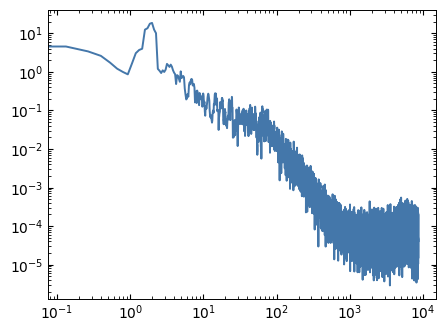

In [11]:
plt.loglog(k.rspec()[0], k.rspec()[1])

In [223]:
k = MTSpec(x=G05[None:date_1].to_numpy(), kspec=8, nfft=2*len(df_ci.D1[None:date_1].to_numpy()), dt=5/60/60/24)

DPSS using interpolation 130321 100000


(1e-07, 0.00030000000000000003)

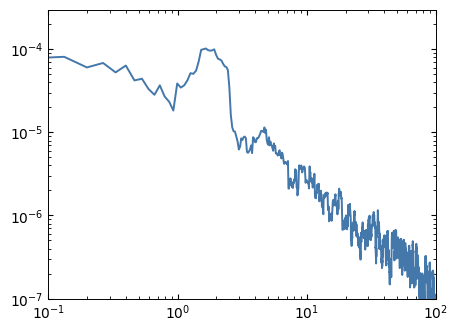

In [225]:
plt.loglog(k.rspec()[0], k.rspec()[1])
plt.xlim(10**-1, 10**2)
plt.ylim(10**-7, 3*10**-4)

In [13]:
from multitaper import MTSpec
nw = 3.5
kspec = 5
dt = 5/60/60/24
x = df_ci.D1.to_numpy()
psd = MTSpec(x=x, nw=nw, kspec=kspec, dt=dt, iadapt=0)

DPSS using interpolation 2471041 1000000


In [70]:
kspec=5
y = G05.to_numpy()
psd_g = MTSpec(x=y, nw=nw, kspec=kspec, dt=dt, iadapt=0)

DPSS using interpolation 2471041 1000000


In [83]:
freq, psd_d = psd_g.rspec()

In [84]:
psd_smooth = smooth(np.squeeze(psd_d), 21)
freq = np.squeeze(freq)

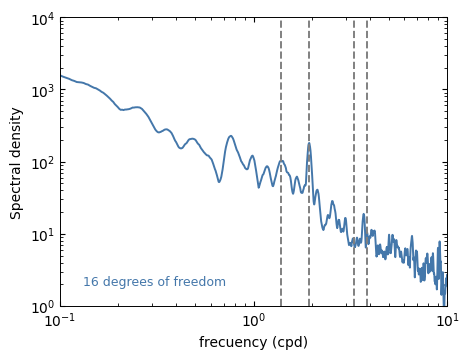

In [81]:
vlines=[1*coriolis_freq_cpd, M2_cpd, M2_cpd + coriolis_freq_cpd, M4_cpd]

plot_spectrum(freq[10:-10], psd_smooth, psd.se[0], 'cpd', xlim=(10**-1, 10**1), ylim=(10**0, 10**4), vlines=vlines)

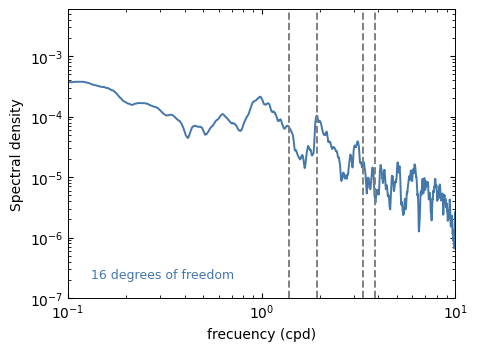

In [87]:
plot_spectrum(freq[10:-10], psd_smooth, psd.se[0], 'cpd', xlim=(10**-1, 10**1), ylim=(10**-7, 6*10**-3), vlines=vlines)